In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
gold = pd.read_csv('../data/raw/gold_data.csv')
sp500 = pd.read_csv('../data/raw/sp500.csv')

In [4]:
gold.head(3)

,Date,Close,High,Low,Open,Volume
0,28/09/2020,1872.800049,1872.800049,1872.800049,1872.800049,10455
1,29/09/2020,1894.300049,1895.400024,1872.400024,1876.500000,3283
2,30/09/2020,1887.500000,1899.699951,1879.800049,1893.000000,600


In [5]:
sp500.head(3)

,Date,Close,High,Low,Open,Volume
0,02/01/2020,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
1,03/01/2020,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2,06/01/2020,3246.280029,3246.840088,3214.639893,3217.550049,3702460000


In [6]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%d/%m/%Y')
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d/%m/%Y')

In [7]:
gold['Date'].min(), gold['Date'].max(), sp500['Date'].min(), sp500['Date'].max()

(Timestamp('2020-09-28 00:00:00'),
 Timestamp('2025-09-25 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2025-09-24 00:00:00'))

In [8]:
# Merge datasets for correlation analysis
df = pd.merge(gold, sp500, on='Date', suffixes=('_gold', '_sp500'))
df.head(3)

,Date,Close_gold,High_gold,Low_gold,Open_gold,Volume_gold,Close_sp500,High_sp500,Low_sp500,Open_sp500,Volume_sp500
0,2020-09-28,1872.800049,1872.800049,1872.800049,1872.800049,10455,3351.600098,3360.739990,3332.909912,3333.899902,3950910000
1,2020-09-29,1894.300049,1895.400024,1872.400024,1876.500000,3283,3335.469971,3357.919922,3327.540039,3350.919922,3661590000
2,2020-09-30,1887.500000,1899.699951,1879.800049,1893.000000,600,3363.000000,3393.560059,3340.469971,3341.209961,4738640000


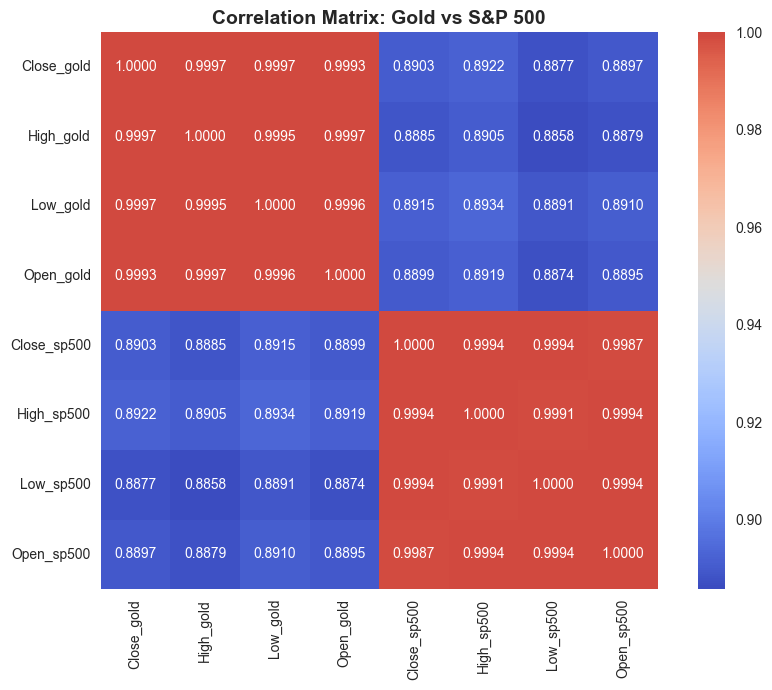

In [9]:
correlation_matrix = df.loc[:, ~df.columns.isin(['Date', 'Volume_gold', 'Volume_sp500'])].corr()

# Create heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=.948, fmt='.4f', square=True)
plt.title('Correlation Matrix: Gold vs S&P 500', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

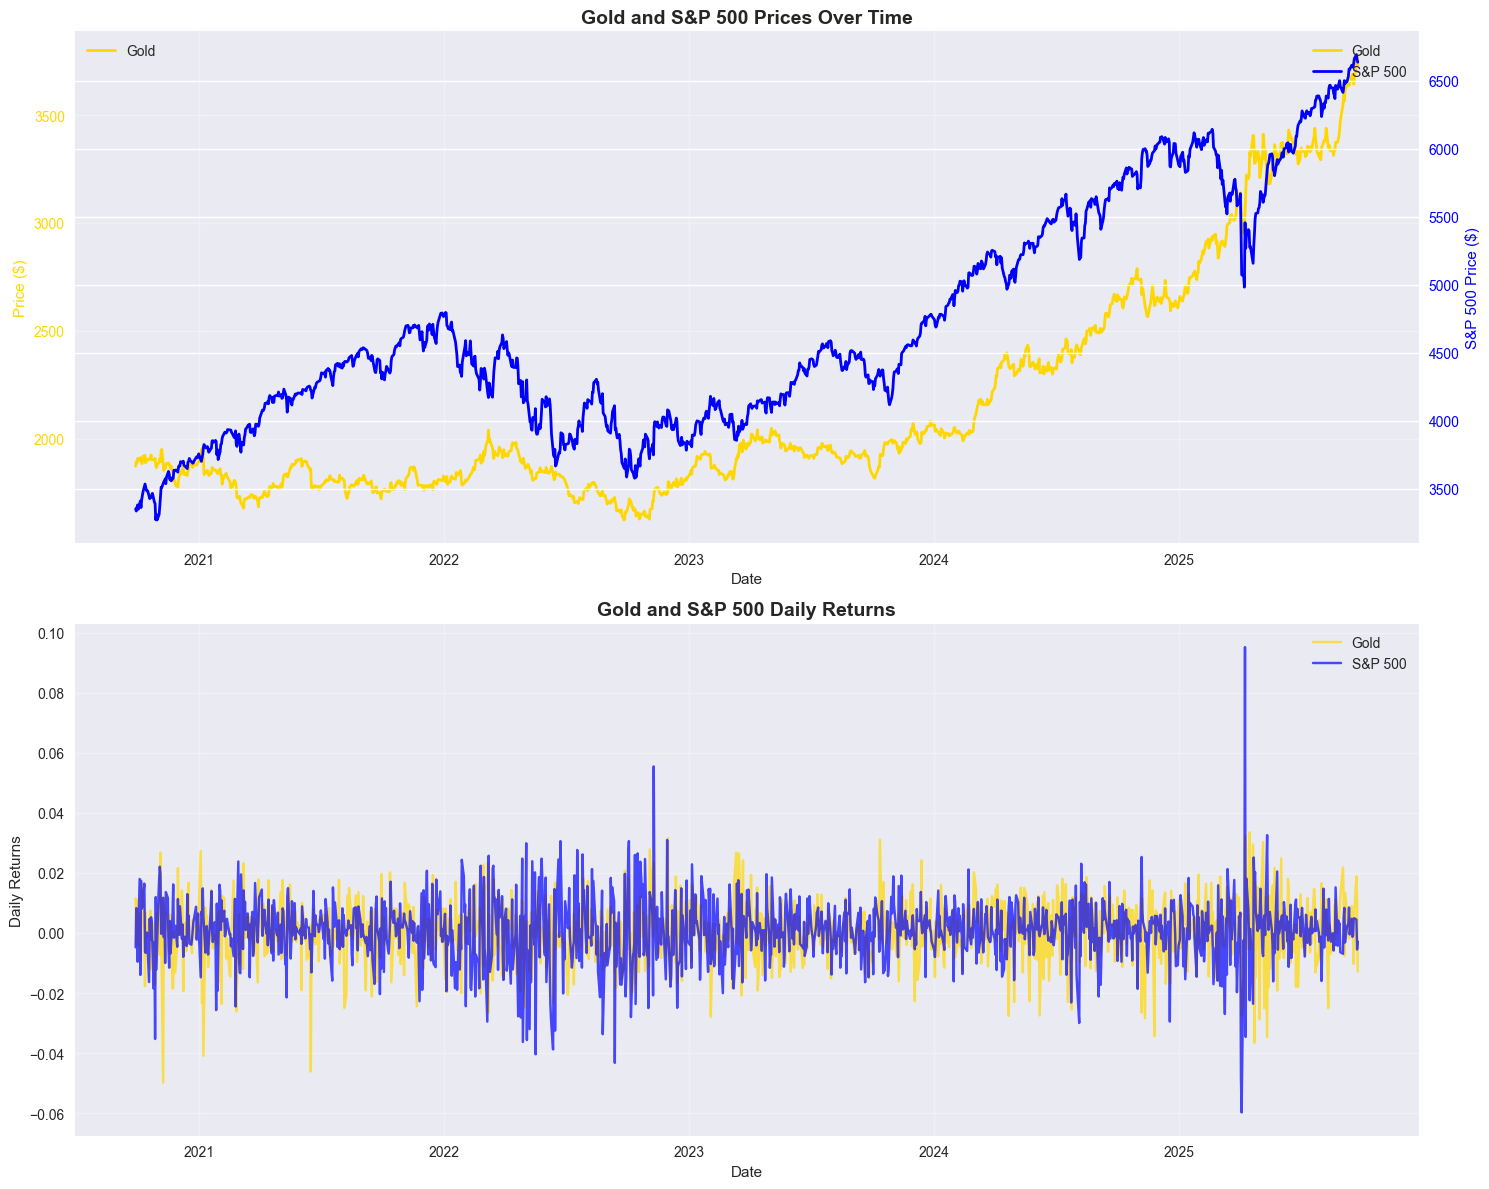

<Figure size 800x550 with 0 Axes>

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
axes = axes.flatten()

# Gold (left axis)
ax1 = axes[0]
ax1.plot(df['Date'], df['Close_gold'], color='gold', linewidth=2, label='Gold')
ax1.set_ylabel('Gold Price ($)', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# S&P 500 (right axis) 
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close_sp500'], color='blue', linewidth=2, label='S&P 500')
ax2.set_ylabel('S&P 500 Price ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add both lines to legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Design
axes[0].set_title('Gold and S&P 500 Prices Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Gold', 'S&P 500'])
axes[1].grid(True, alpha=0.3)

# Returns
df['Gold_Returns'] = df['Close_gold'].pct_change()
df['SP500_Returns'] = df['Close_sp500'].pct_change()

axes[1].plot(df['Date'], df['Gold_Returns'], color='gold', alpha=0.7)
axes[1].plot(df['Date'], df['SP500_Returns'], color='blue', alpha=0.7)
#Design

axes[1].set_title('Gold and S&P 500 Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns')
axes[1].legend(['Gold', 'S&P 500'])
axes[1].grid(True, alpha=0.3)



axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Add statistics as text annotations
stats_text = (
    f"Gold Range: ${df['Close_gold'].min():.2f} - ${df['Close_gold'].max():.2f}\n"
    f"S&P 500 Range: ${df['Close_sp500'].min():.2f} - ${df['Close_sp500'].max():.2f}\n\n"
    f"Gold volatility (std): {df['Gold_Returns'].std():.4f} ({df['Gold_Returns'].std()*100:.2f}%)\n"
    f"S&P 500 volatility (std): {df['SP500_Returns'].std():.4f} ({df['SP500_Returns'].std()*100:.2f}%)"
)

# Add text box to figure
plt.gcf().text(0.02, -0.1, stats_text, fontsize=10, fontfamily='monospace', 
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', pad=10))
plt.subplots_adjust(bottom=0.3)  # Make room for the text


In [11]:
print(df.dtypes)
print(df.head())


Date             datetime64[ns]
Close_gold              float64
High_gold               float64
Low_gold                float64
Open_gold               float64
Volume_gold               int64
Close_sp500             float64
High_sp500              float64
Low_sp500               float64
Open_sp500              float64
Volume_sp500              int64
Gold_Returns            float64
SP500_Returns           float64
dtype: object
        Date   Close_gold    High_gold     Low_gold    Open_gold  Volume_gold  \
0 2020-09-28  1872.800049  1872.800049  1872.800049  1872.800049        10455   
1 2020-09-29  1894.300049  1895.400024  1872.400024  1876.500000         3283   
2 2020-09-30  1887.500000  1899.699951  1879.800049  1893.000000          600   
3 2020-10-01  1908.400024  1909.599976  1882.500000  1884.099976          730   
4 2020-10-02  1900.199951  1913.000000  1893.900024  1893.900024          530   

   Close_sp500   High_sp500    Low_sp500   Open_sp500  Volume_sp500  \
0  3351.6000

In [12]:
data_prices = df[["Close_gold", "Close_sp500"]].copy()

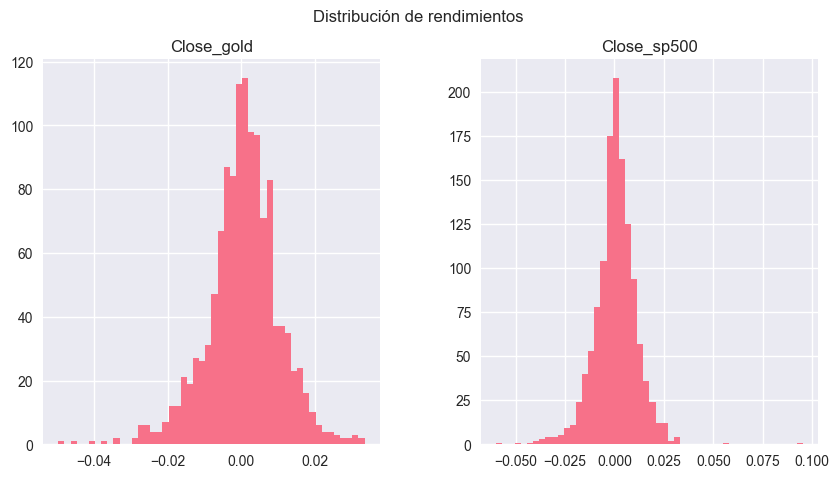

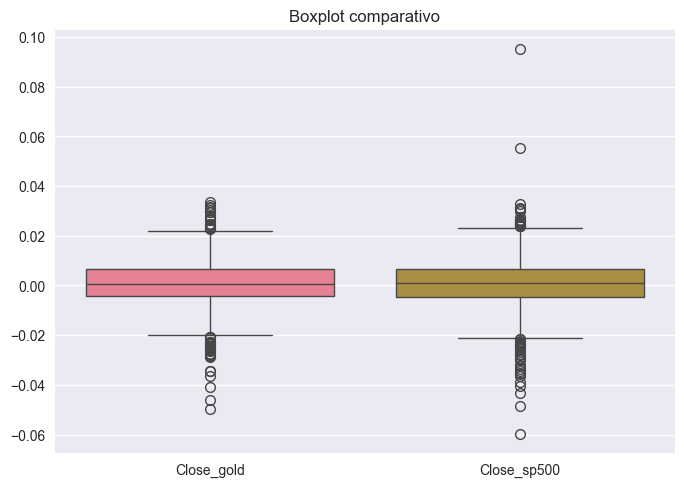

In [13]:
returns = data_prices.pct_change().dropna()

# Histogramas
returns.hist(bins=50, figsize=(10,5))
plt.suptitle("Distribución de rendimientos")
plt.show()

# Boxplot para comparar
sns.boxplot(data=returns)
plt.title("Boxplot comparativo")
plt.show()

In [14]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_num = df[numeric_cols].copy()

In [15]:
print(df_num.describe().T)

                count          mean           std          min           25%  \
Close_gold     1254.0  2.153594e+03  5.068279e+02  1623.300049  1.812375e+03   
High_gold      1254.0  2.163949e+03  5.101116e+02  1623.300049  1.819550e+03   
Low_gold       1254.0  2.142426e+03  5.019062e+02  1615.099976  1.803500e+03   
Open_gold      1254.0  2.152725e+03  5.054426e+02  1620.400024  1.811000e+03   
Volume_gold    1254.0  4.296122e+03  2.249974e+04     0.000000  8.100000e+01   
Close_sp500    1254.0  4.685694e+03  8.137003e+02  3269.959961  4.076578e+03   
High_sp500     1254.0  4.710825e+03  8.134294e+02  3304.929932  4.094247e+03   
Low_sp500      1254.0  4.656851e+03  8.125964e+02  3233.939941  4.048862e+03   
Open_sp500     1254.0  4.684491e+03  8.136375e+02  3277.169922  4.075065e+03   
Volume_sp500   1254.0  4.376414e+09  9.679033e+08     0.000000  3.788635e+09   
Gold_Returns   1253.0  5.985349e-04  9.798999e-03    -0.049787 -4.400198e-03   
SP500_Returns  1253.0  6.037250e-04  1.0

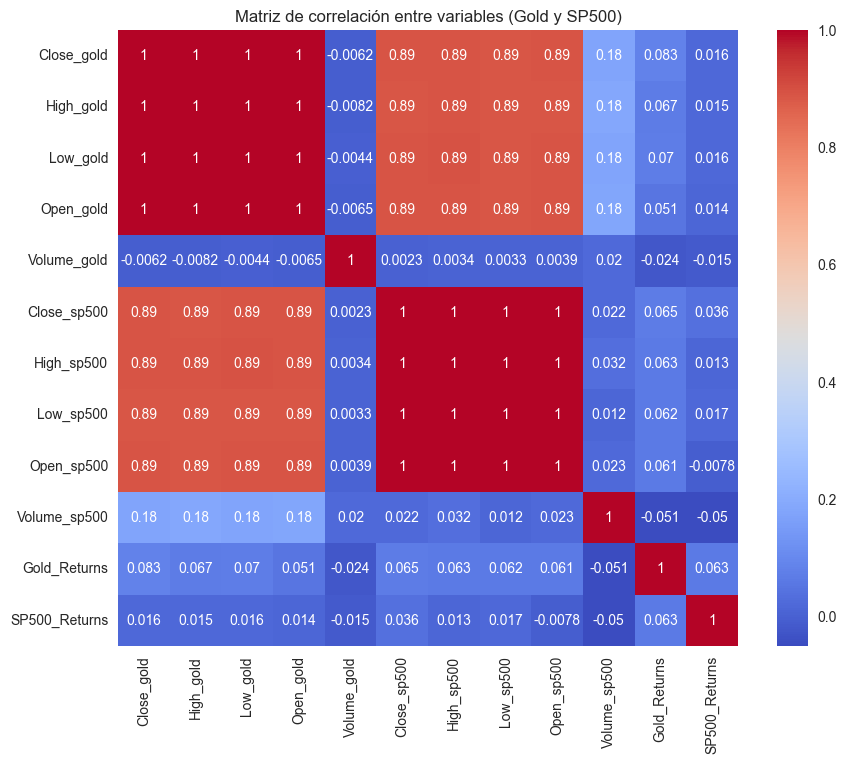

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables (Gold y SP500)")
plt.show()

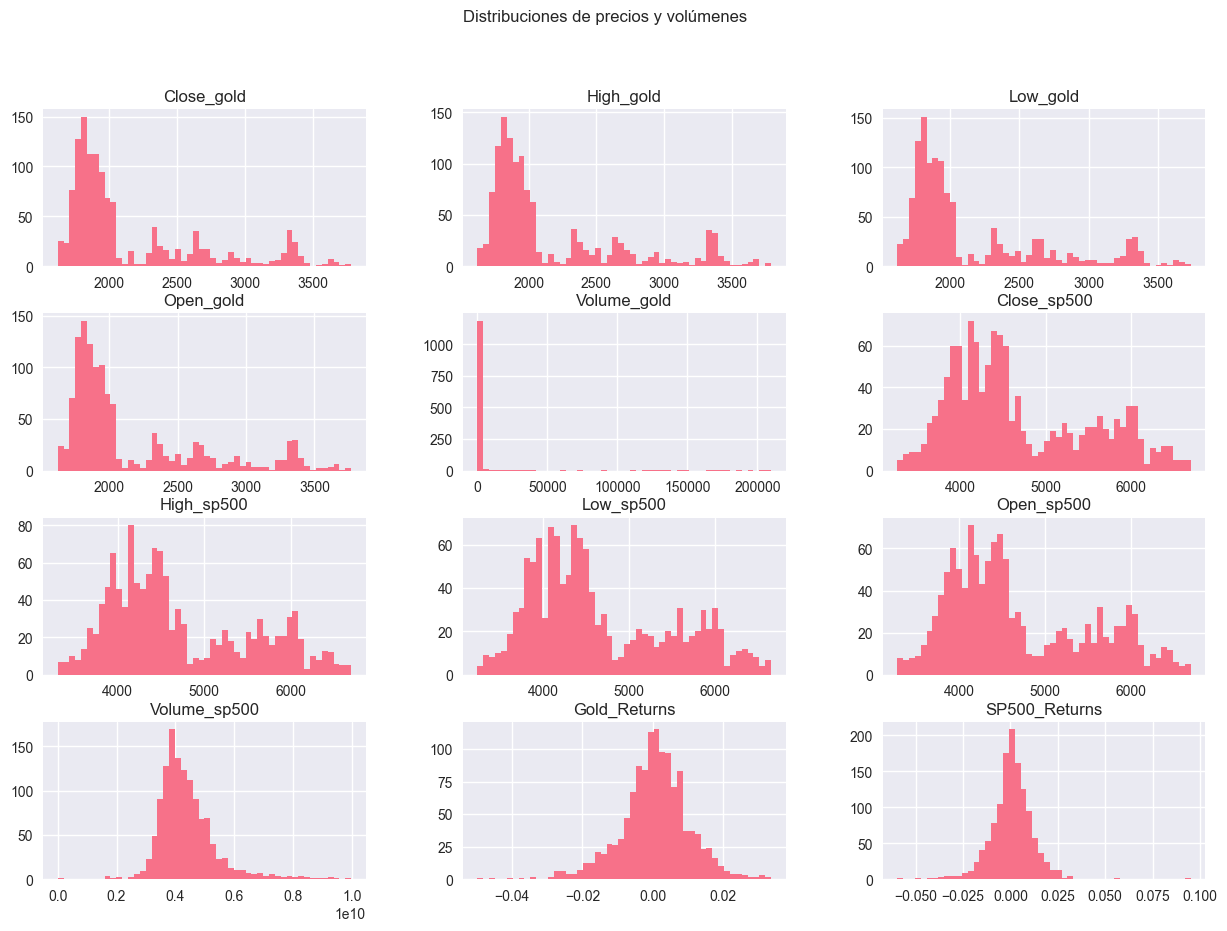

In [17]:
df_num.hist(bins=50, figsize=(15,10))
plt.suptitle("Distribuciones de precios y volúmenes")
plt.show()

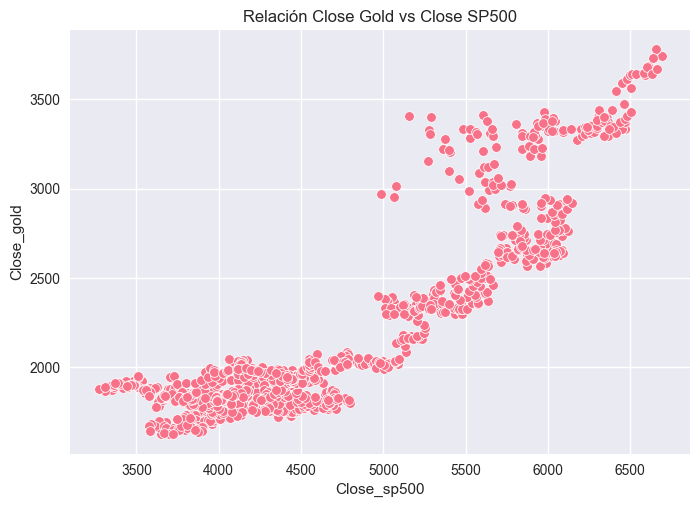

In [18]:
sns.scatterplot(x="Close_sp500", y="Close_gold", data=df_num)
plt.title("Relación Close Gold vs Close SP500")
plt.show()

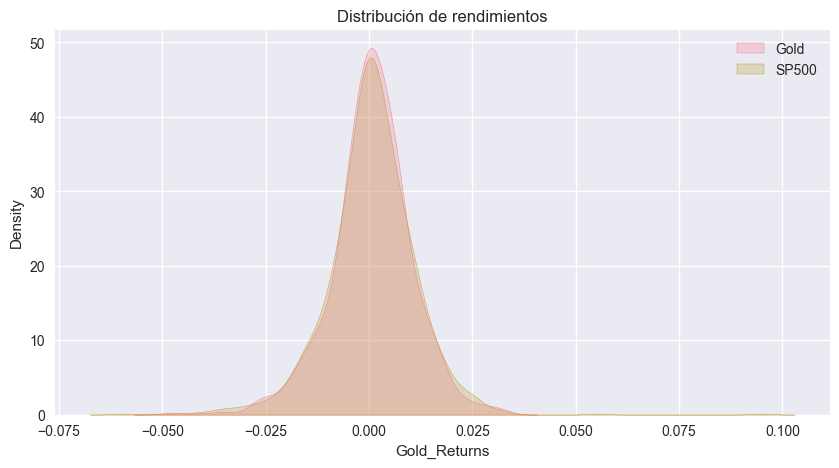

               Gold_Returns  SP500_Returns
Gold_Returns       1.000000       0.063219
SP500_Returns      0.063219       1.000000


In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_num, x="Gold_Returns", shade=True, label="Gold")
sns.kdeplot(data=df_num, x="SP500_Returns", shade=True, label="SP500")
plt.title("Distribución de rendimientos")
plt.legend()
plt.show()

print(df_num[["Gold_Returns", "SP500_Returns"]].corr())

=== CORRELATION ANALYSIS ===
Price correlation: 0.8903
Returns correlation: 0.0632


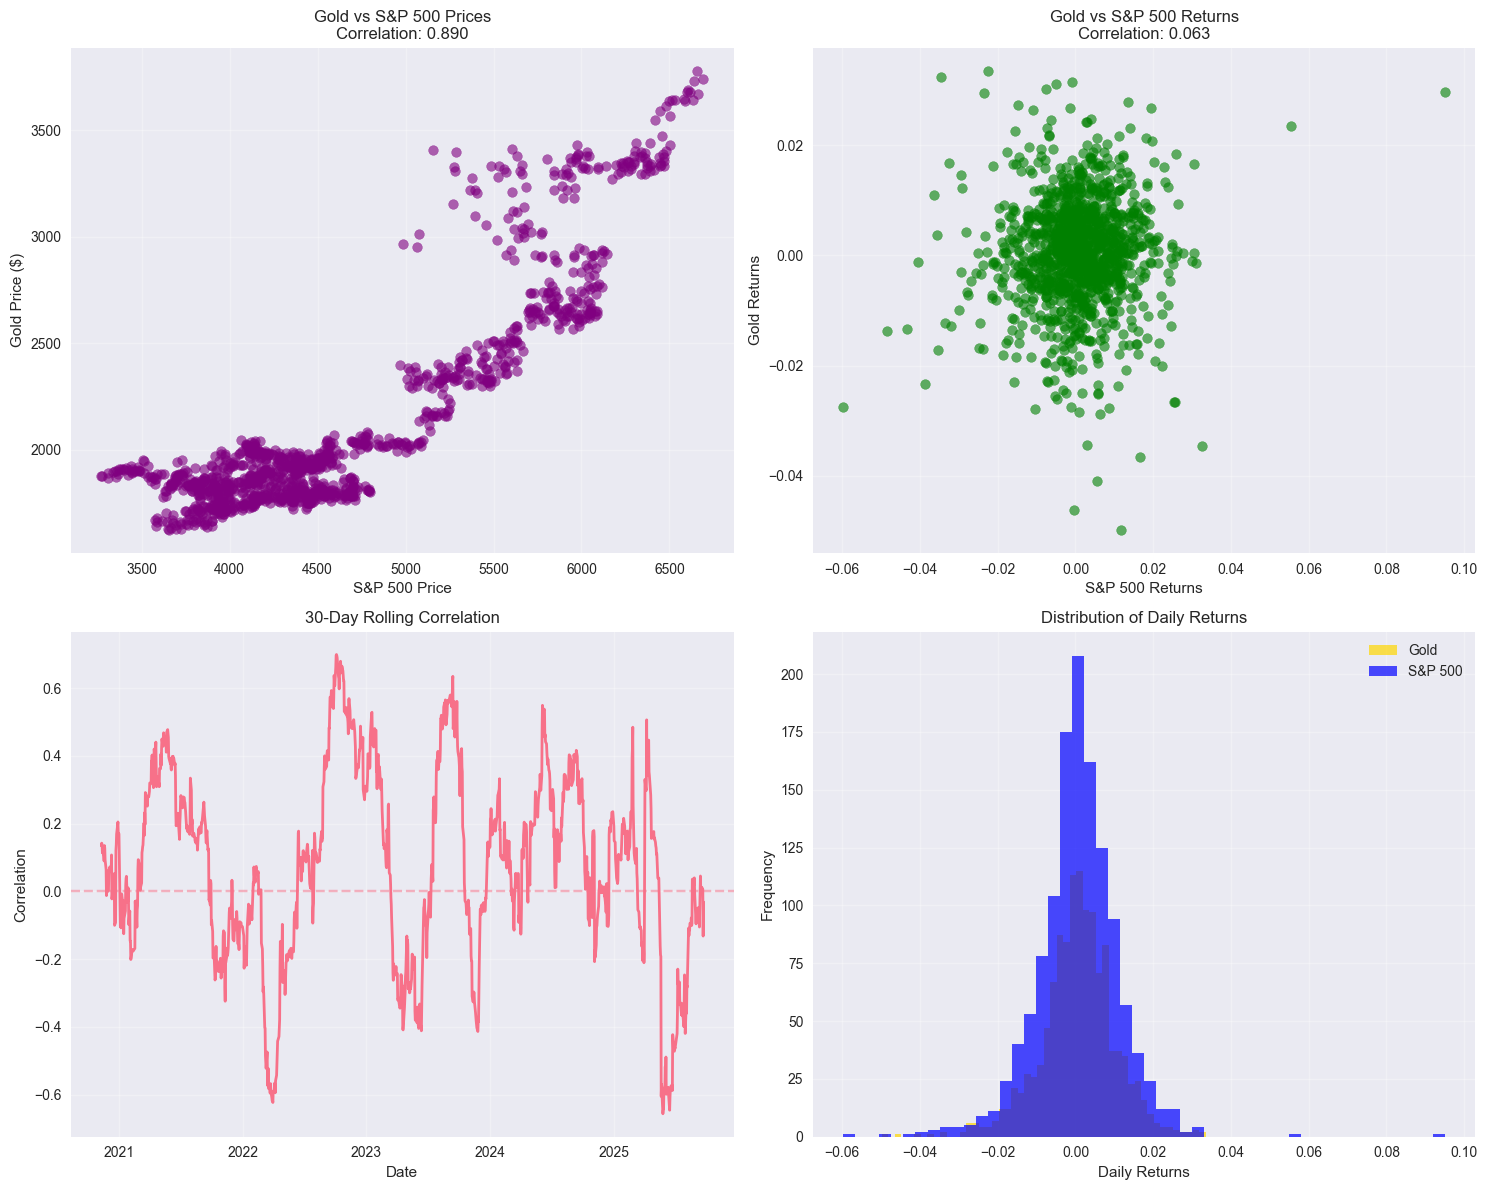


=== CORRELATION INSIGHTS ===
Price correlation strength: Strong
Returns correlation strength: Weak
Average rolling correlation: 0.0774
Rolling correlation range: -0.6561 to 0.6989


In [20]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")

# Calculate correlations
price_correlation = df['Close_gold'].corr(df['Close_sp500'])
returns_correlation = df['Gold_Returns'].corr(df['SP500_Returns'])

print(f"Price correlation: {price_correlation:.4f}")
print(f"Returns correlation: {returns_correlation:.4f}")

# Create correlation visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot: Gold vs S&P 500 prices
axes[0, 0].scatter(df['Close_sp500'], df['Close_gold'], alpha=0.6, color='purple')
axes[0, 0].set_xlabel('S&P 500 Price')
axes[0, 0].set_ylabel('Gold Price ($)')
axes[0, 0].set_title(f'Gold vs S&P 500 Prices\nCorrelation: {price_correlation:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot: Returns
axes[0, 1].scatter(df['SP500_Returns'], df['Gold_Returns'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('S&P 500 Returns')
axes[0, 1].set_ylabel('Gold Returns')
axes[0, 1].set_title(f'Gold vs S&P 500 Returns\nCorrelation: {returns_correlation:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Rolling correlation (30-day window)
# Rolling correlation (30-day window)
rolling_corr = df['Gold_Returns'].rolling(window=30).corr(df['SP500_Returns'])

axes[1, 0].plot(df['Date'], rolling_corr, linewidth=2)
axes[1, 0].set_title('30-Day Rolling Correlation')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Correlation')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, linestyle='--', alpha=0.5)


# Distribution of returns
axes[1, 1].hist(df['Gold_Returns'].dropna(), bins=50, alpha=0.7, label='Gold', color='gold')
axes[1, 1].hist(df['SP500_Returns'].dropna(), bins=50, alpha=0.7, label='S&P 500', color='blue')
axes[1, 1].set_title('Distribution of Daily Returns')
axes[1, 1].set_xlabel('Daily Returns')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional correlation insights
print(f"\n=== CORRELATION INSIGHTS ===")
print(f"Price correlation strength: {'Strong' if abs(price_correlation) > 0.7 else 'Moderate' if abs(price_correlation) > 0.3 else 'Weak'}")
print(f"Returns correlation strength: {'Strong' if abs(returns_correlation) > 0.7 else 'Moderate' if abs(returns_correlation) > 0.3 else 'Weak'}")
print(f"Average rolling correlation: {rolling_corr.mean():.4f}")
print(f"Rolling correlation range: {rolling_corr.min():.4f} to {rolling_corr.max():.4f}")